# Import Libraries

In [5]:
%pip install seaborn -q
%pip install scikit-learn -q
%pip install tqdm -q
%pip install tensorflow -q

/bin/bash: /anaconda/envs/jupyter_env/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Note: you may need to restart the kernel to use updated packages.
/bin/bash: /anaconda/envs/jupyter_env/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Note: you may need to restart the kernel to use updated packages.
/bin/bash: /anaconda/envs/jupyter_env/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Note: you may need to restart the kernel to use updated packages.
/bin/bash: /anaconda/envs/jupyter_env/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set(style='whitegrid')
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, LSTM, SimpleRNN, Conv1D, Input, BatchNormalization
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications import ResNet50

2023-02-28 15:42:25.297459: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-28 15:42:26.831808: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/intel/compilers_and_libraries_2018.3.222/linux/mpi/intel64/lib:/opt/intel/compilers_and_libraries_2018.3.222/linux/mpi/mic/lib:/opt/intel/compilers_and_libraries_2018.3.222/linux/mpi/intel64/lib:/opt/intel/compilers_and_libraries_2018.3.222/linux/mpi/mic/lib::/anaconda/envs/jupyter_env/lib/:/usr/local/cuda/lib64:/usr/local/cuda/extras/CUPTI/lib64/:/anaconda/envs/jupyter_env/lib/:/usr/local/cud

In [7]:
RANDOM_SEED = 1337
SPEC_SHAPE = (224, 224) # height x width
EPOCHS=10

In [8]:

train = pd.read_csv('./train_metadata.csv',)

# EDA

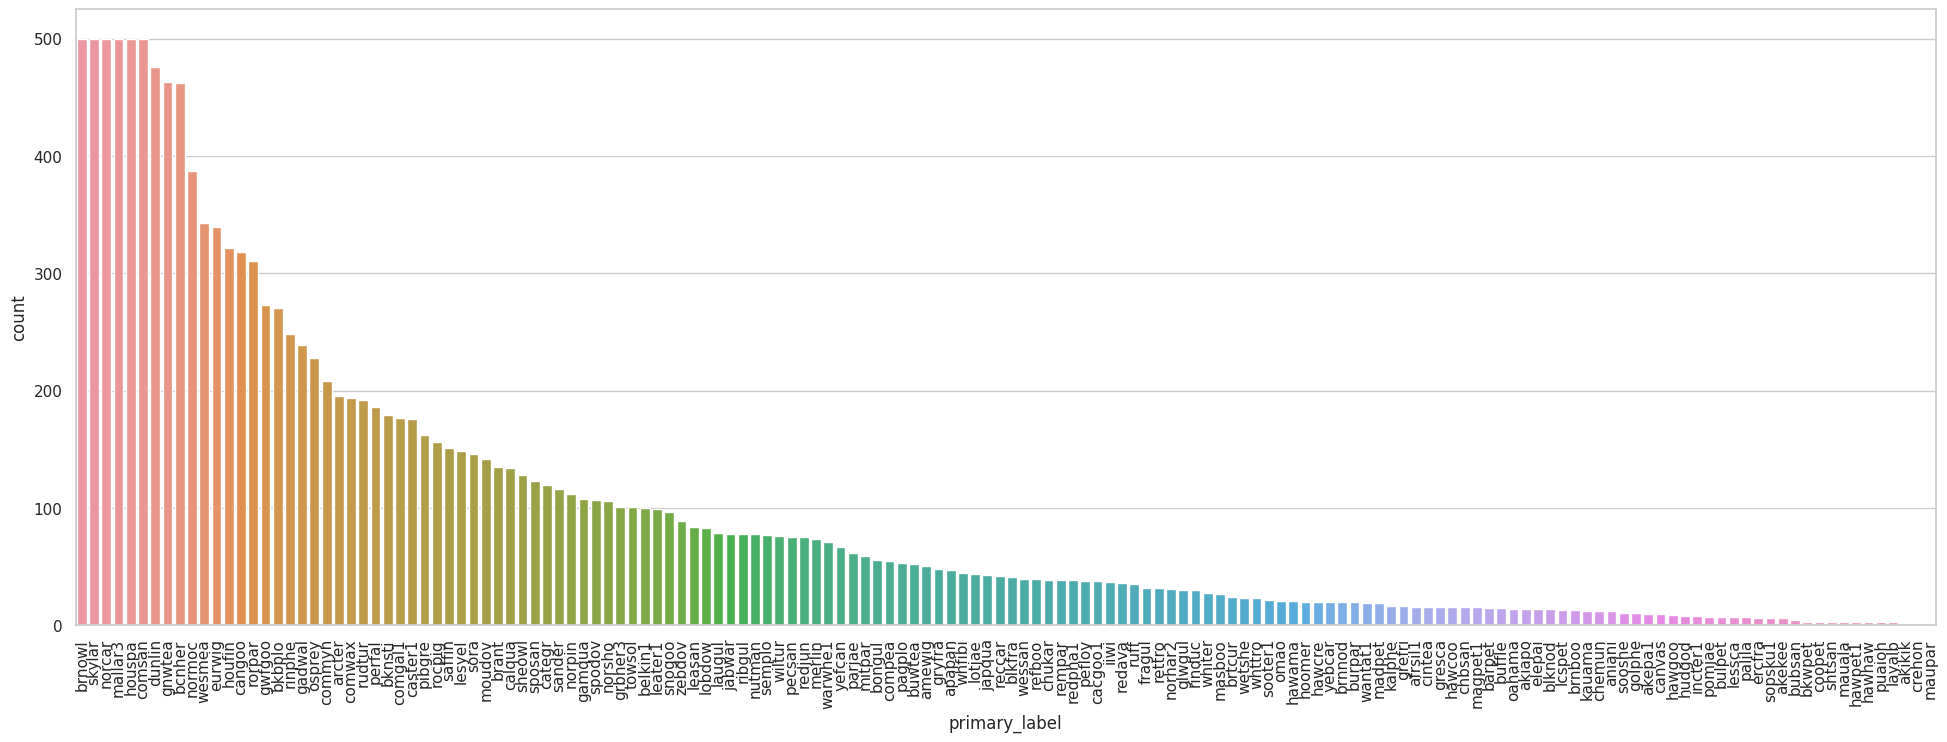

In [9]:
fig, ax = plt.subplots(figsize=(24, 8))
sns.countplot(data= train, x='primary_label', ax=ax, order= train['primary_label'].value_counts().index)
plt.xticks(rotation=90);

In [10]:
train.primary_label.unique()

array(['afrsil1', 'akekee', 'akepa1', 'akiapo', 'akikik', 'amewig',
       'aniani', 'apapan', 'arcter', 'barpet', 'bcnher', 'belkin1',
       'bkbplo', 'bknsti', 'bkwpet', 'blkfra', 'blknod', 'bongul',
       'brant', 'brnboo', 'brnnod', 'brnowl', 'brtcur', 'bubsan',
       'buffle', 'bulpet', 'burpar', 'buwtea', 'cacgoo1', 'calqua',
       'cangoo', 'canvas', 'caster1', 'categr', 'chbsan', 'chemun',
       'chukar', 'cintea', 'comgal1', 'commyn', 'compea', 'comsan',
       'comwax', 'coopet', 'crehon', 'dunlin', 'elepai', 'ercfra',
       'eurwig', 'fragul', 'gadwal', 'gamqua', 'glwgul', 'gnwtea',
       'golphe', 'grbher3', 'grefri', 'gresca', 'gryfra', 'gwfgoo',
       'hawama', 'hawcoo', 'hawcre', 'hawgoo', 'hawhaw', 'hawpet1',
       'hoomer', 'houfin', 'houspa', 'hudgod', 'iiwi', 'incter1',
       'jabwar', 'japqua', 'kalphe', 'kauama', 'laugul', 'layalb',
       'lcspet', 'leasan', 'leater1', 'lessca', 'lesyel', 'lobdow',
       'lotjae', 'madpet', 'magpet1', 'mallar3', 'masboo

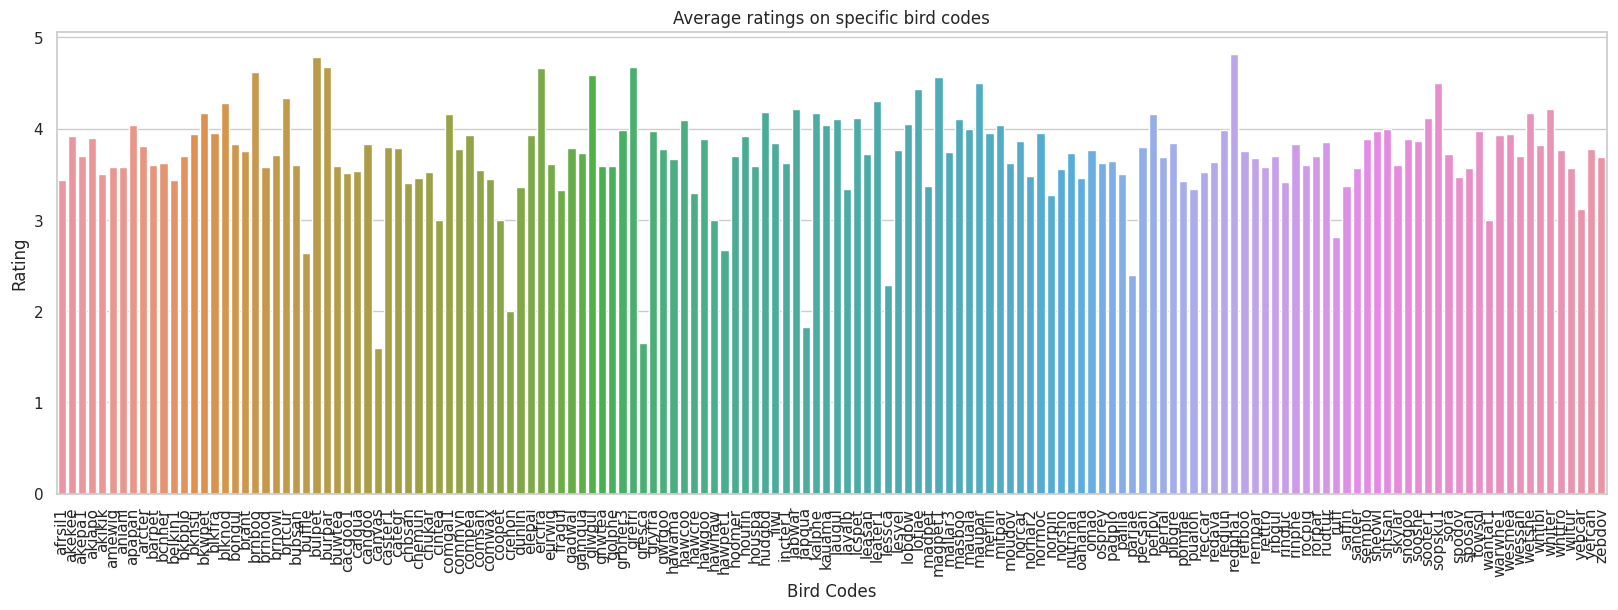

In [11]:
avg_ratings = train.groupby("primary_label").agg({"rating" : "mean"})
plt.figure(figsize = (20, 6))
sns.barplot(x=avg_ratings.index, y=avg_ratings.rating)
plt.title("Average ratings on specific bird codes")
plt.xlabel("Bird Codes")
plt.ylabel("Rating")
plt.xticks(rotation = 90)
plt.show()

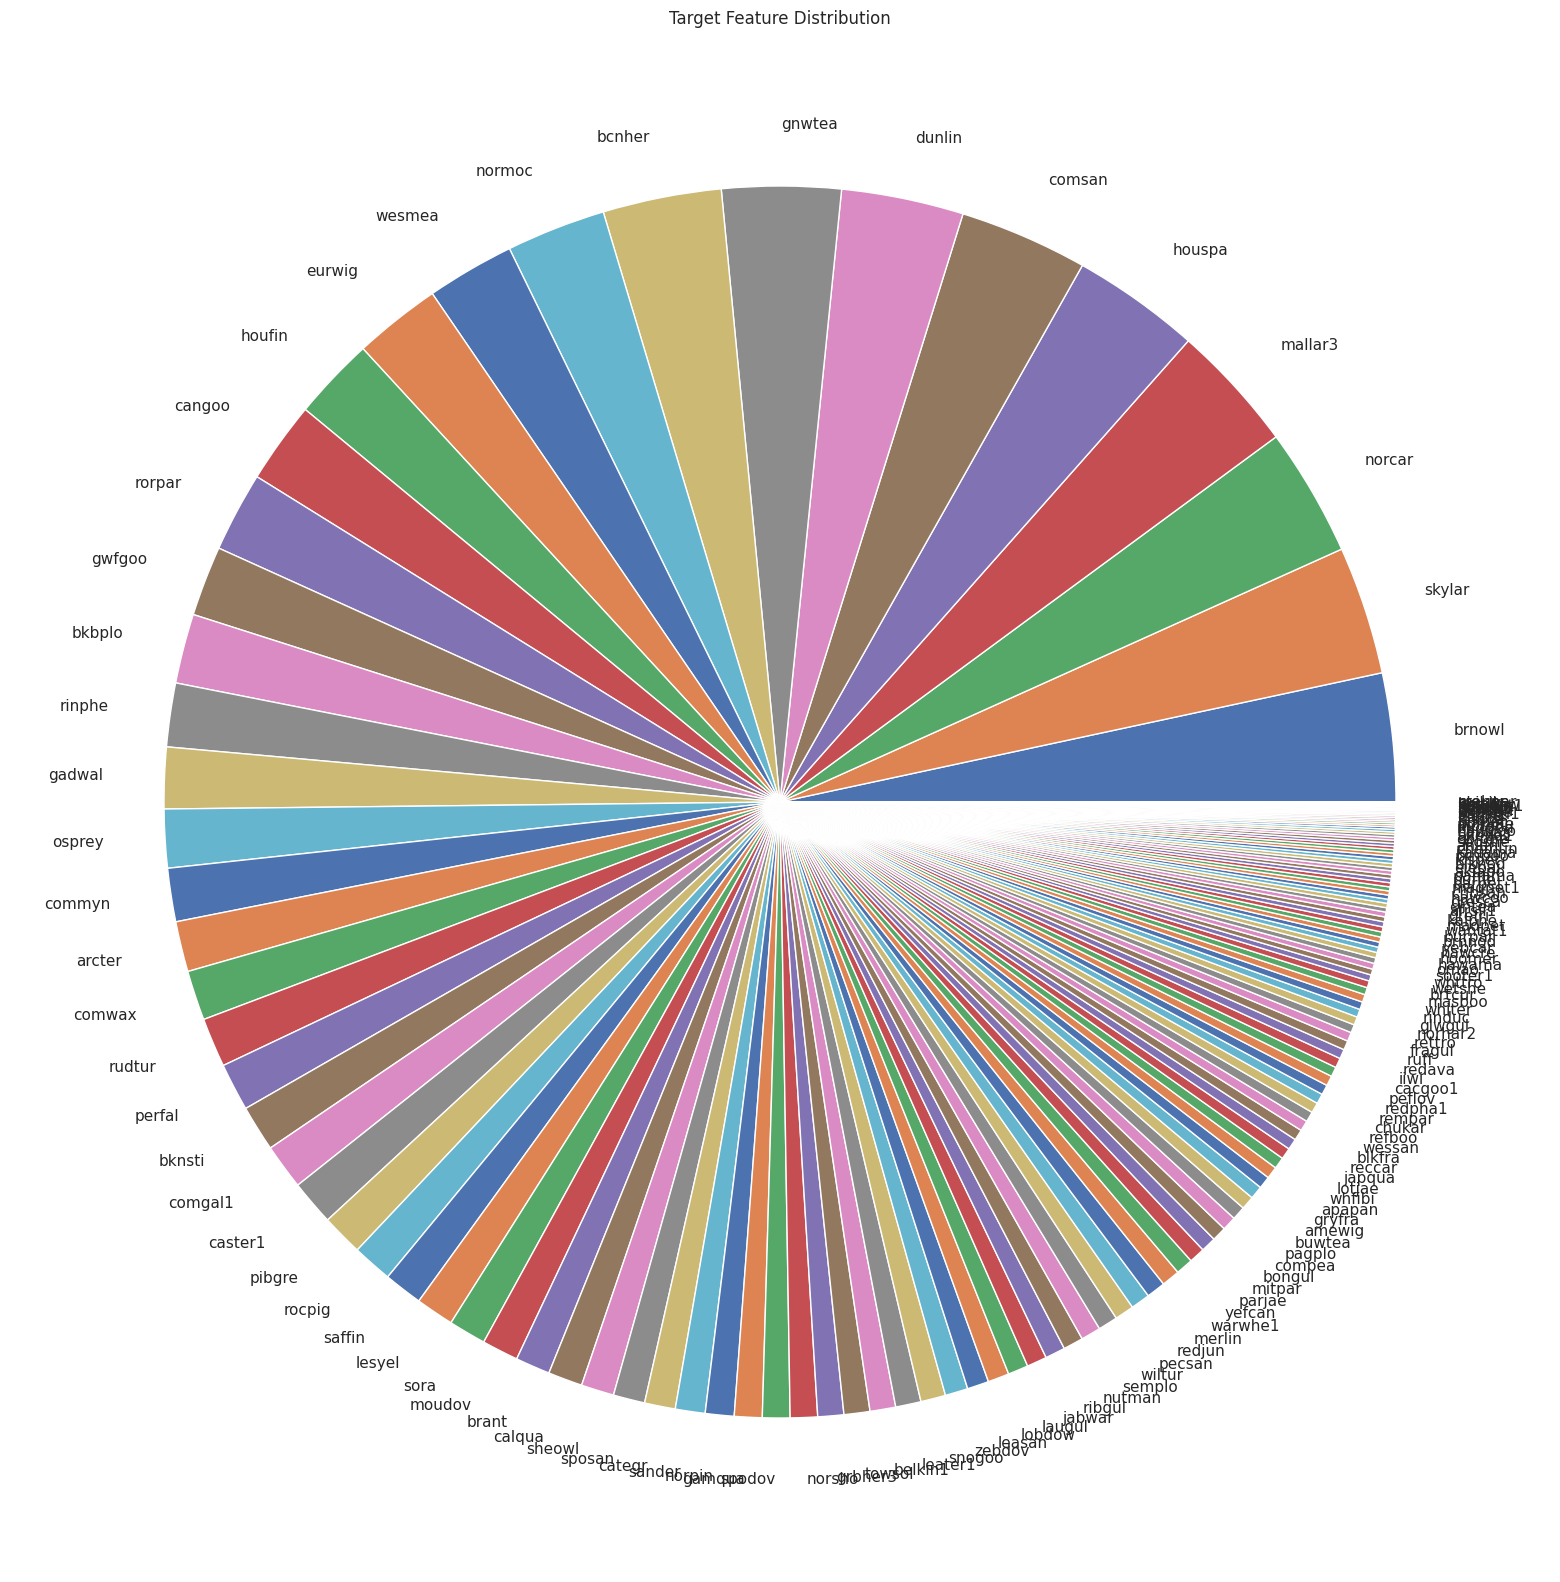

In [12]:
target_feature_dist = train.primary_label.value_counts()
plt.figure(figsize = (20, 20))
plt.pie(target_feature_dist.values, labels= target_feature_dist.index)
plt.title("Target Feature Distribution")
plt.show()

In [14]:
train_folder = './treated_white'
# valid_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest",
    preprocessing_function=preprocess_input,
    validation_split=0.2)

print('Train:')
train_generator = datagen.flow_from_directory(train_folder, 
#                         target_size=(coefs.sshape[0],coefs.sshape[1]),  # target size
                        target_size=(224,224),
                        batch_size=64, 
                        seed=2022,
                        shuffle=True,
                        subset = "training",
                        class_mode='categorical')    # batch size

print('Validation:')
validation_generator = datagen.flow_from_directory(train_folder, 
#                         target_size=(coefs.sshape[0],coefs.sshape[1]),  # target size
                        target_size=(224,224),
                        batch_size=64,
                        seed=2022,
                        shuffle=True,
                        subset = "validation",
                        class_mode='categorical')    # batch size

Train:
Found 6127 images belonging to 21 classes.
Validation:
Found 1517 images belonging to 21 classes.


In [15]:
LEARNING_RATE = 0.001
num_epochs = 10
BATCH_SIZE = 64
IMG_SIZE = (224,224,3)

CATEGORIES = len(validation_generator.class_indices)

In [17]:
def plot_history(H):
    plt.style.use("ggplot")
    plt.figure()
    plt.plot(np.arange(0, len(H.history["loss"])), H.history["loss"], label="train_loss")
    plt.plot(np.arange(0, len(H.history["val_loss"])), H.history["val_loss"], label="val_loss")
    plt.plot(np.arange(0, len(H.history["accuracy"])), H.history["accuracy"], label="train_acc")
    plt.plot(np.arange(0, len(H.history["val_accuracy"])), H.history["val_accuracy"], label="val_acc")
    plt.title("Training Loss and Accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss/Accuracy")
    plt.legend(loc="lower left")
    plt.show()

# CNN

In [18]:
def My_CNNmodel():

  model = tf.keras.models.Sequential()
  model.add(layers.Conv2D(32, (5, 5), padding='same',activation='relu', input_shape=IMG_SIZE))
  model.add(layers.MaxPooling2D(pool_size=(2,2)))
  model.add(layers.Conv2D(16, (3, 3), padding='same',activation='relu'))
  model.add(layers.MaxPooling2D(pool_size=(2,2)))
  model.add(layers.Conv2D(32, (3, 3), padding='same',activation='relu'))
  model.add(layers.MaxPooling2D(pool_size=(2,2)))
  model.add(layers.Conv2D(64, (3, 3), padding='same',activation='relu'))
  model.add(layers.MaxPooling2D(pool_size=(2,2)))
  model.add(layers.Flatten())
  model.add(layers.Dense(512, activation='relu'))
  model.add(layers.Dense(CATEGORIES, activation='softmax'))

  opt=tf.keras.optimizers.Adam(0.001)
  model.compile(optimizer=opt,
              loss='categorical_crossentropy', # loss='categorical_crossentropy' if softmax
              metrics=['accuracy'])

  return model

In [19]:
model=My_CNNmodel()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 16)      4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 32)       0

2023-02-28 15:43:15.253905: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-02-28 15:43:15.253976: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (cpu-comp-jno): /proc/driver/nvidia/version does not exist
2023-02-28 15:43:15.256450: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
H = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=num_epochs)

Epoch 1/10
47/47 [==============================] - 600s 11s/step - loss: 7.3399 - accuracy: 0.3704 - val_loss: 1.7170 - val_accuracy: 0.5128
Epoch 2/10
47/47 [==============================] - 210s 4s/step - loss: 1.7202 - accuracy: 0.5196 - val_loss: 1.6183 - val_accuracy: 0.5426
Epoch 3/10
47/47 [==============================] - 167s 4s/step - loss: 1.6009 - accuracy: 0.5543 - val_loss: 1.5926 - val_accuracy: 0.5483
Epoch 4/10
47/47 [==============================] - 131s 3s/step - loss: 1.5280 - accuracy: 0.5623 - val_loss: 1.5096 - val_accuracy: 0.5597
Epoch 5/10
47/47 [==============================] - 130s 3s/step - loss: 1.5052 - accuracy: 0.5573 - val_loss: 1.4608 - val_accuracy: 0.5639
Epoch 6/10
47/47 [==============================] - 138s 3s/step - loss: 1.4150 - accuracy: 0.58

2023-02-24 11:35:44.304656: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8204
2023-02-24 11:36:06.640271: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-02-24 11:36:26.032846: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f44c000a580 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-02-24 11:36:26.032889: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): Tesla K80, Compute Capability 3.7
2023-02-24 11:36:26.039865: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-02-24 11:36:26.168847: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-02-24 11:36:26.241190: I tensorflow/compiler/jit/xla_compilation_cache.cc:47

history = model.fit(train_generator,
          epochs = 20, 
          validation_data=validation_generator)

H = history
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, len(H.history["loss"])), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, len(H.history["val_loss"])), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, len(H.history["accuracy"])), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, len(H.history["val_accuracy"])), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="lower left")
plt.show()

In [ ]:
model.save('bird_model_cnn.h5')
plot_history(H)

# Resnet 50

In [20]:
base_model = ResNet50(weights='imagenet',include_top=False, input_shape=IMG_SIZE)

# Construct the head of the model that will be placed on top of the base model
head_model = base_model.output
head_model = GlobalAveragePooling2D()(head_model)
head_model = Flatten(name="flatten")(head_model)
head_model = Dense(CATEGORIES, activation="softmax")(head_model)
model = Model(inputs=base_model.input, outputs=head_model)

for layer in base_model.layers:
    layer.trainable = True
model.summary()
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])


94765736/94765736 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                             

KeyboardInterrupt: 

In [ ]:
H = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=num_epochs)

In [ ]:
model.save('bird_model_resnet50.h5')
plot_history(H)

# EfficientNetB0

In [22]:
base_model = EfficientNetB0(weights='imagenet',include_top=False, input_shape=IMG_SIZE)

# Construct the head of the model that will be placed on top of the base model
head_model = base_model.output
head_model = GlobalAveragePooling2D()(head_model)
head_model = Flatten(name="flatten")(head_model)
head_model = Dense(CATEGORIES, activation="softmax")(head_model)
model = Model(inputs=base_model.input, outputs=head_model)

for layer in base_model.layers:
    layer.trainable = True
model.summary()
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])



Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_2 (Rescaling)        (None, 224, 224, 3)  0           ['input_3[0][0]']                
                                                                                                  
 normalization_1 (Normalization  (None, 224, 224, 3)  7          ['rescaling_2[0][0]']            
 )                                                                                                
                                                                                            

In [ ]:
H = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=num_epochs)

In [ ]:
model.save('bird_model_efficientnetB0.h5')
plot_history(H)